In [91]:
import glob
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import ast

In [92]:
os.getcwd()
PATH=os.getcwd()+'/data/out/predictive'

In [93]:
def read_data_from_folder(folder_path):
    dfs = pd.DataFrame()
    file_count = 0  # counter for loaded files

    # Regex to extract the number after "participant_" and before ".csv"
    # This regex looks for "participant_" followed by one or more digits (\d+)
    # and captures these digits. It expects ".csv" at the end.
    participant_id_regex = re.compile(r'model_(\d+)\.csv')


    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)

            # Extract model_id from filename using regex
            match = participant_id_regex.search(filename)
            if match:
                model_id = int(match.group(1)) # Convert the captured digits to an integer
                df['model_id'] = model_id # Add the model_id column
            else:
                # Handle cases where the filename doesn't match the expected format
                print(f"Warning: Could not extract model_id from filename: {filename}")
                df['model_id'] = None # Or some other indicator of missing ID

            dfs = pd.concat([dfs, df], ignore_index=True)
            file_count += 1  # increment counter

    print(f"{file_count} CSV file(s) loaded.")
    return dfs

In [94]:
df_centaur=read_data_from_folder(f'{PATH}/centaur-8B/singles')

32 CSV file(s) loaded.


In [95]:
# save choices where model and human agree
df_centaur_model_human = df_centaur[df_centaur['model_choice'] == df_centaur['human_choice']].copy()

In [96]:
#sum of nll for agreement
val_nll_centaur_8b_model_human=-(df_centaur_model_human['log_likelihood'].sum())

In [97]:
#sum of nll for all choices
val_nll=-(df_centaur['log_likelihood'].sum())

In [98]:
def calculate_log_likelihood_stats(df, column_name='log_likelihood'):
    """
    Calculates the mean and standard error of the mean (SEM)
    for the specified column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame containing a
                           'log_likelihood' column.

    Returns:
        tuple: A tuple containing the mean log-likelihood and the SEM.
    """
    # Drop missing log-likelihoods (NaN)
    valid_ll = df[column_name].dropna()

    # Compute mean and SEM
    if not valid_ll.empty:
        mean_ll = valid_ll.mean()
        sem_ll = valid_ll.std(ddof=1) / np.sqrt(len(valid_ll))
        return mean_ll, sem_ll
    else:
        return None, None

In [99]:
mean_ll_centaur_8b, sem_ll_centaur_8b = calculate_log_likelihood_stats(df_centaur)

In [100]:
mean_ll_centaur_8b_human, sem_ll_centaur_8b_human = calculate_log_likelihood_stats(df_centaur_model_human)
print(f"Mean Log-Likelihood (centaur_8b_human): {mean_ll_centaur_8b_human:.4f}")
print(f"SEM (centaur_8b_human): {sem_ll_centaur_8b_human:.4f}")

Mean Log-Likelihood (centaur_8b_human): -0.1783
SEM (centaur_8b_human): 0.0032


In [101]:
df_centaur_70b=read_data_from_folder(f'{PATH}/centaur-70B/singles')

32 CSV file(s) loaded.


In [102]:
mean_ll_centaur_70b, sem_ll_centaur_70b = calculate_log_likelihood_stats(df_centaur_70b)
print(f"Mean Log-Likelihood (centaur_70b): {mean_ll_centaur_70b:.4f}")
print(f"SEM (centaur_70b): {sem_ll_centaur_70b:.4f}")

Mean Log-Likelihood (centaur_70b): -0.4546
SEM (centaur_70b): 0.0112


In [103]:
centaur_70b_model_human = df_centaur_70b[df_centaur_70b['model_choice'] == df_centaur_70b['human_choice']].copy()

In [104]:
mean_ll_centaur_70b_model_human, sem_ll_centaur_70b_model_human = calculate_log_likelihood_stats(centaur_70b_model_human)
print(f"Mean Log-Likelihood (centaur_70b_model_human): {mean_ll_centaur_70b_model_human:.4f}")
print(f"SEM (centaur_70b_model_human): {sem_ll_centaur_70b_model_human:.4f}")

Mean Log-Likelihood (centaur_70b_model_human): -0.1856
SEM (centaur_70b_model_human): 0.0028


In [105]:
df_llama=read_data_from_folder(f'{PATH}/llama-8B/singles')

32 CSV file(s) loaded.


In [106]:
mean_ll_llama, sem_ll_llama = calculate_log_likelihood_stats(df_llama)
print(f"Mean Log-Likelihood (llama): {mean_ll_llama:.4f}")
print(f"SEM (llama): {sem_ll_llama:.4f}")

Mean Log-Likelihood (llama): -0.5128
SEM (llama): 0.0094


In [107]:
llama_8b_model_human = df_llama[df_llama['model_choice'] == df_llama['human_choice']].copy()

In [108]:
mean_ll_llama_8b_model_human, sem_ll_llama_8b_model_human = calculate_log_likelihood_stats(llama_8b_model_human)
print(f"Mean Log-Likelihood (llama_8b_model_human): {mean_ll_llama_8b_model_human:.4f}")
print(f"SEM (llama_8b_model_human): {sem_ll_llama_8b_model_human:.4f}")

Mean Log-Likelihood (llama_8b_model_human): -0.2926
SEM (llama_8b_model_human): 0.0033


In [109]:
df_llama_70b=read_data_from_folder(f'{PATH}/llama-70B/singles')

32 CSV file(s) loaded.


In [110]:
mean_ll_llama_70b, sem_ll_llama_70b = calculate_log_likelihood_stats(df_llama_70b)
print(f"Mean Log-Likelihood (llama_70b): {mean_ll_llama_70b:.4f}")
print(f"SEM (llama_70b): {sem_ll_llama_70b:.4f}")

Mean Log-Likelihood (llama_70b): -0.8257
SEM (llama_70b): 0.0353


In [111]:
llama_70b_model_human = df_llama_70b[df_llama_70b['model_choice'] == df_llama_70b['human_choice']].copy()

In [112]:
mean_ll_llama_70b_model_human, sem_ll_llama_70b_model_human = calculate_log_likelihood_stats(llama_70b_model_human)
print(f"Mean Log-Likelihood (llama_70b_model_human): {mean_ll_llama_70b_model_human:.4f}")
print(f"SEM (llama_70b_model_human): {sem_ll_llama_70b_model_human:.4f}")

Mean Log-Likelihood (llama_70b_model_human): -0.0327
SEM (llama_70b_model_human): 0.0018


In [113]:
# prompt: load /content/drive/MyDrive/centaur/rw_model_metrics_horizon.json

import json

with open(f'{PATH}/rw/rw_model_metrics.json', 'r') as f:
    metrics_data = json.load(f)


In [114]:
# prompt: load /content/drive/MyDrive/centaur/rw_model_metrics_horizon.json

import json

with open(f'{PATH}/repetetive/repetetive_metrics.json', 'r') as f:
    metrics_data_repetetive = json.load(f)


In [115]:
metrics_data

{'validation_nll': 1361.0198180187288,
 'average_log_loss_per_trial': 0.42531869313085274}

In [116]:
# prompt: extract average loss into mean_rw

# The negative log-likelihood is the loss.
# The average loss is the mean negative log-likelihood.
# The function calculate_log_likelihood_stats returns the mean log-likelihood.
# We need the negative of this mean for the average loss.
mean_rw = metrics_data.get('average_log_loss_per_trial', None)
mean_repetetive = metrics_data_repetetive.get('average_log_loss_per_trial', None)

In [117]:
sem_rw=mean_rw/np.sqrt(len(df_centaur))
sem_repetetive=mean_repetetive/np.sqrt(len(df_centaur))

In [118]:
plt.rcParams.update({
    'font.size': 22,        # everything (titles, labels, ticks, legend) gets bigger
    'axes.titlesize': 30,   # override just titles if you want
    'axes.labelsize': 28,   # axis labels
    'xtick.labelsize': 26,  # x-tick labels
    'ytick.labelsize': 28,  # y-tick labels
    'legend.fontsize': 22 #  # legend text
})

In [119]:
def plot_loglikelihood_bars(mu_centaur, sd_centaur,
                             mu_centaurB, sd_centaurB,
                             mu_llama, sd_llama,
                             mu_llamaB, sd_llamaB,
                             mu_rw, sd_rw,
                             mu_rep, sd_rep,
                             variant_labels = ['8B', '70B', '8B', '70B', 'RW','Rep'],
                             family_labels  = ['Centaur', 'LLama 3.1', 'Domain-Specific\nModel'],
                             colors = ['#E69F00', '#D55E00', '#56B4E9', '#0072B2', '#CC79A7'],
                             figsize=(12, 10)):
    """
    Clean and stylized grouped bar plot with NLL means and error bars.
    Includes two-level x-axis labels, grouped spacing, and a random guessing reference line.
    """
    # Values
    means = [-mu_centaur, -mu_centaurB, mu_llama, mu_llamaB, mu_rw,mu_rep]
    errs  = [sd_centaur, sd_centaurB, sd_llama, sd_llamaB, sd_rw,sd_rep]

    # Bar placement
    w = 0.50
    gap_in = 0.00
    gap_out = 0.1
    xpos = np.array([
        0,
        0 + w + gap_in,                             # Centaur-70B
        0 + 2*w + gap_in + gap_out,                 # LLaMA-8B
        0 + 3*w + 2*gap_in + gap_out,               # LLaMA-70B
        0 + 4*w + 2*gap_in + 2*gap_out,             # RW
        0 + 5*w + 3*gap_in + 2*gap_out              # Repetetive

    ])

    # Index groups for secondary x-axis labeling
    family_slices = [(0,1), (2,3), (4,5)]
    fig, ax = plt.subplots(figsize=figsize)

    # Bars
    bars=ax.bar(xpos, means, w,
           yerr=errs, capsize=5,
           color=colors, edgecolor='black', linewidth=0.3)
    for bar in bars:
      height = bar.get_height()
      ax.annotate(f'{height:.4f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),
                  textcoords="offset points",
                  ha='center', va='bottom')


    # Chance line
    chance_nll = -np.log(0.5)
    ax.axhline(chance_nll, ls='--', c='grey', lw=1.2)
    ax.text(xpos[-2] + w*0.2, chance_nll, 'Random guessing',
            va='bottom', ha='left',fontsize=18)

    # X-axis: tick labels (1st tier)
    ax.set_xticks(xpos)
    ax.set_xticklabels(variant_labels, ha='center')

    # X-axis: group labels (2nd tier)
    for i, family_slice in enumerate(family_slices):
        if isinstance(family_slice, tuple):
            i0, i1 = family_slice
            center = (xpos[i0] + xpos[i1]) / 2
        else:
            center = xpos[family_slice]
        ax.text(center, -0.10, family_labels[i],
                ha='center', va='top',
                transform=ax.get_xaxis_transform(),
                fontsize=28
                )

    # Visual group dividers
    for i, family_slice in enumerate(family_slices[:-1]):
        if isinstance(family_slice, tuple):
            i0, i1 = family_slice
            ax.axvline(xpos[i1] + w/2 + gap_out/2, color='grey', lw=1)
        else:
            ax.axvline(xpos[family_slice] + w/2 + gap_out/2, color='grey', lw=1)

    # Axis labels and title
    ax.set_ylabel('Negative Log-Likelihood (NLL)')
    #ax.set_title('Predictive Performance')

    # Styling
    ax.spines[['top', 'right','left','bottom']].set_visible(True)
    ax.grid(False)
    ax.margins(x=0.04)
    # Hide all spines (top, bottom, left, right)
    for spine in ax.spines.values():
        spine.set_visible(True)

    # Get current axis limits (where bars are)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    plt.tight_layout()
    return fig

In [120]:
def plot_loglikelihood_bars_large_only(mu_centaurB, sd_centaurB,
                                       mu_llamaB, sd_llamaB,
                                       mu_rw, sd_rw,
                                       variant_labels = ['70B', '70B', 'RW'],
                                       family_labels  = ['Centaur', 'LLaMA 3.1', 'Domain-Specific\nModel'],
                                       colors = ['#D55E00', '#0072B2', '#CC79A7'],
                                       figsize=(10, 8)):
    """
    Plot NLL bar chart for three models with labels.
    """
    # Values
    means = [-mu_centaurB, -mu_llamaB, mu_rw]
    errs  = [sd_centaurB, sd_llamaB, sd_rw]

    # Simple evenly spaced positions
    xpos = np.array([0, 1, 2])
    bar_width = 0.6

    fig, ax = plt.subplots(figsize=figsize)

    # Plot bars
    bars = ax.bar(xpos, means, bar_width,
                  yerr=errs, capsize=5,
                  color=colors, edgecolor='black', linewidth=0.3)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Chance line
    chance_nll = -np.log(0.5)
    ax.axhline(chance_nll, ls='--', c='grey', lw=1.2)
    ax.text(xpos[-1]-0.1, chance_nll, 'Random guessing',
            va='bottom', ha='left', fontsize=14)

    # X-axis: tick labels
    ax.set_xticks(xpos)
    ax.set_xticklabels(variant_labels, ha='center', fontsize=16)

    # Family labels below tick labels
    for i, x in enumerate(xpos):
        ax.text(x, -0.12, family_labels[i],
                ha='center', va='top',
                transform=ax.get_xaxis_transform(),
                fontsize=20)

    # Styling
    ax.set_ylabel('Negative Log-Likelihood (NLL)', fontsize=16)
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(False)
    ax.margins(x=0.1)

    plt.tight_layout()
    return fig


In [121]:
#human,centaur-7b,centaur-80b,llama-8b,llama-reason,rw,some other
colors_grouped= ['#44403B','#E69F00', '#D55E00', '#56B4E9', '#0072B2','#CC79A7','#009E73']

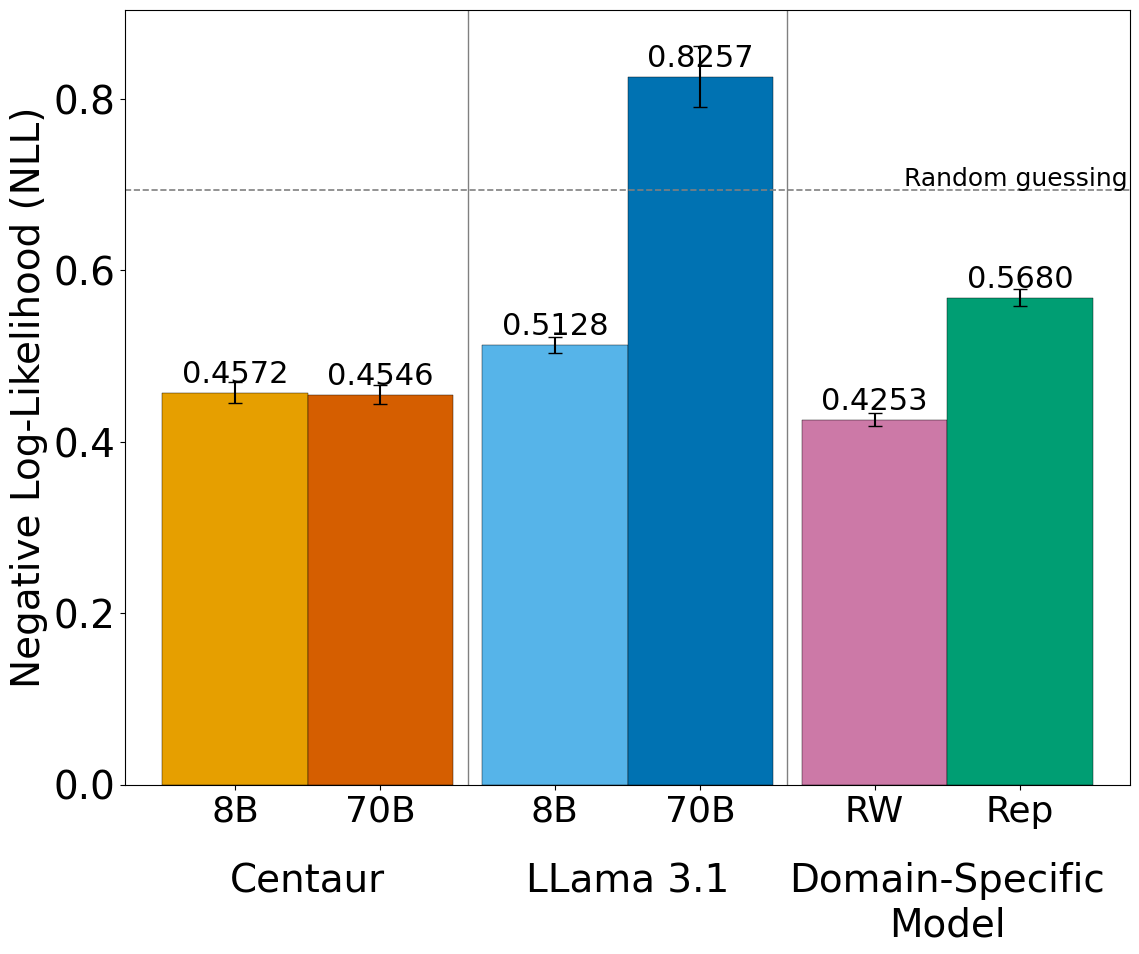

In [122]:
nll_reverse_learning=plot_loglikelihood_bars(
    mu_centaur=mean_ll_centaur_8b,mu_centaurB=mean_ll_centaur_70b,mu_llama=-mean_ll_llama,mu_llamaB=-mean_ll_llama_70b,mu_rw=mean_rw,mu_rep=mean_repetetive,
    sd_centaur=sem_ll_centaur_8b,sd_centaurB=sem_ll_centaur_70b,sd_llama=sem_ll_llama,sd_llamaB=sem_ll_llama_70b,sd_rw=sem_rw,sd_rep=sem_repetetive,
                        colors=colors_grouped[1:]
                                             )

In [123]:
nll_reverse_learning.savefig('figures/nll_reverse_learning.png', format='png', dpi=600, edgecolor='white', bbox_inches='tight', pad_inches=0.1)

In [124]:
colors_large_models_only= ['#D55E00', '#0072B2', '#CC79A7', '#009E73']

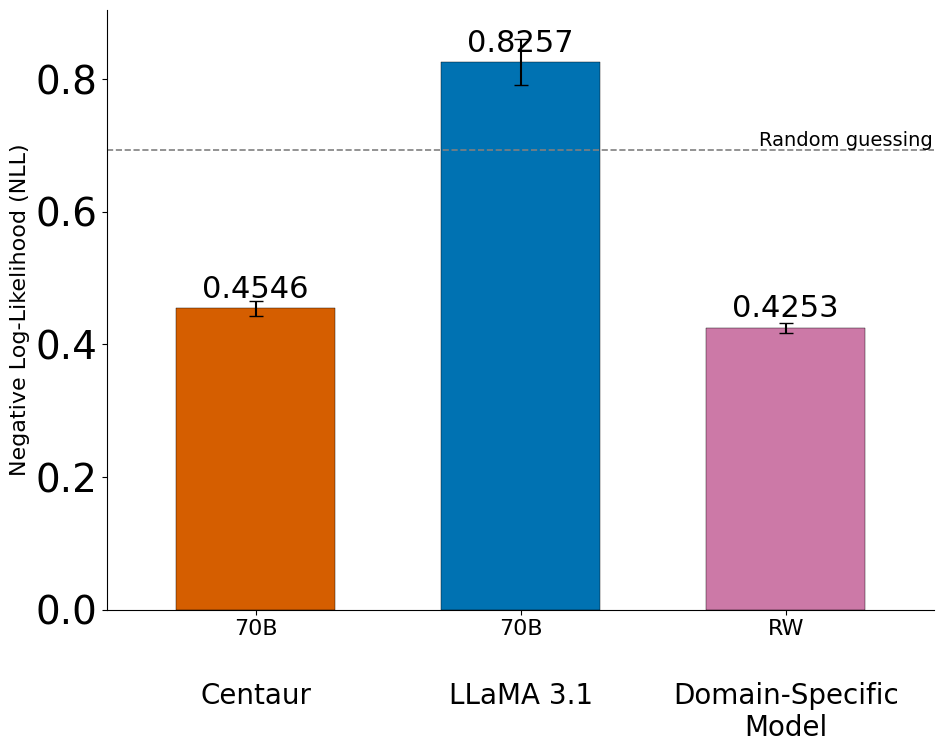

In [125]:
nll_reverse_learning_large_models_only=plot_loglikelihood_bars_large_only(
    mu_centaurB=mean_ll_centaur_70b,mu_llamaB=mean_ll_llama_70b,mu_rw=mean_rw,
    sd_centaurB=sem_ll_centaur_70b,sd_llamaB=sem_ll_llama_70b,sd_rw=sem_rw,
                        colors=colors_large_models_only

)

In [126]:
nll_reverse_learning_large_models_only.savefig('figures/nll_reverse_learning_large_3.pdf', format='pdf', dpi=600, edgecolor='white', bbox_inches='tight', pad_inches=0.1)

In [127]:
# prompt: function that calculates percentage when model_choice==human_choice
def calculate_agreement_percentage(df):
    """
    Calculates the percentage of rows where 'model_choice' equals 'human_choice'.

    Args:
        df (pd.DataFrame): The input DataFrame containing 'model_choice' and 'human_choice' columns.

    Returns:
        float: The percentage of agreement between model and human choices.
               Returns 0.0 if the DataFrame is empty or has no 'model_choice' or 'human_choice' columns.
    """
    if 'model_choice' not in df.columns or 'human_choice' not in df.columns or df.empty:
        return 0.0

    agreement_count = (df['model_choice'] == df['human_choice']).sum()
    print(agreement_count)
    total_rows = len(df)

    if total_rows == 0:
        return 0.0

    return (agreement_count / total_rows) * 100


In [128]:
# Example usage with the existing horizon_8b_llama DataFrame
agreement_percentage_8b_llama = calculate_agreement_percentage(df_llama)

print(f"Agreement Percentage (horizon_8b_llama): {agreement_percentage_8b_llama:.2f}%")

2520
Agreement Percentage (horizon_8b_llama): 78.75%


In [129]:
agreement_percentage_70b_llama = calculate_agreement_percentage(df_llama_70b)
print(f"Agreement Percentage (horizon_70b_llama): {agreement_percentage_70b_llama:.2f}%")

2637
Agreement Percentage (horizon_70b_llama): 82.41%


In [130]:
agreement_percentage_8b_centaur=calculate_agreement_percentage(df_centaur)
print(f"Agreement Percentage (horizon_8b_centaur): {agreement_percentage_8b_centaur:.2f}%")

2597
Agreement Percentage (horizon_8b_centaur): 81.16%


In [131]:
agreement_percentage_70b_centaur=calculate_agreement_percentage(df_centaur_70b)
print(f"Agreement Percentage (horizon_70b_centaur): {agreement_percentage_70b_centaur:.2f}%")

2574
Agreement Percentage (horizon_70b_centaur): 80.44%


C:\Users\snamazova\AppData\Local\Temp\ipykernel_33260\104060064.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Agreement Percentage', data=agreement_df, palette='viridis')


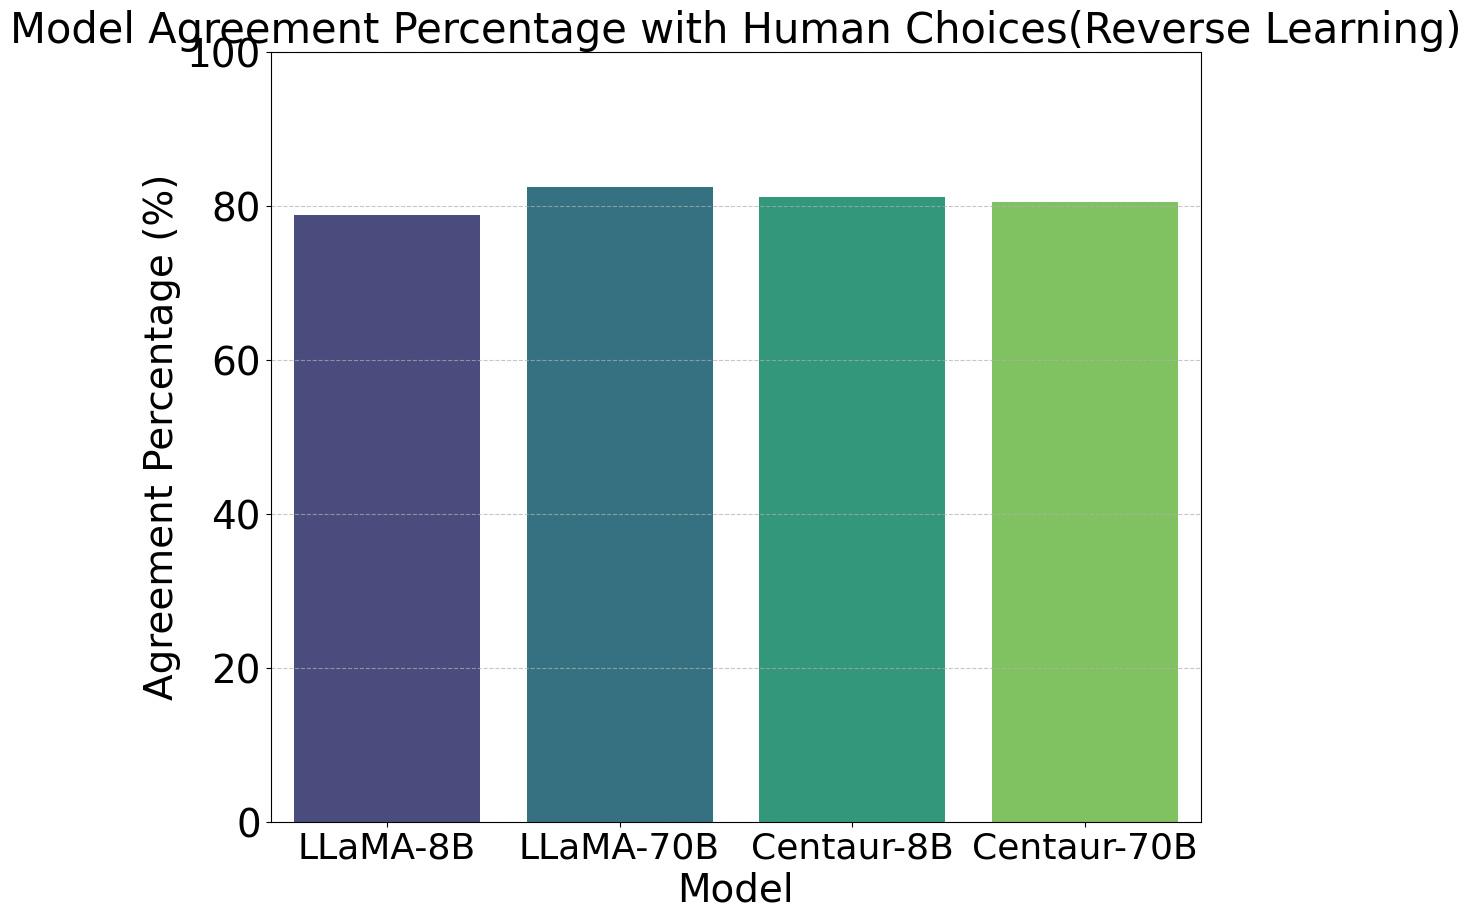

In [132]:
# Create a dictionary to hold the agreement percentages
agreement_data = {
    'Model': ['LLaMA-8B', 'LLaMA-70B', 'Centaur-8B', 'Centaur-70B'],
    'Agreement Percentage': [
        agreement_percentage_8b_llama,
        agreement_percentage_70b_llama,
        agreement_percentage_8b_centaur,
        agreement_percentage_70b_centaur
    ]
}

# Create a pandas DataFrame from the data
agreement_df = pd.DataFrame(agreement_data)

# Create the bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Model', y='Agreement Percentage', data=agreement_df, palette='viridis')
plt.title('Model Agreement Percentage with Human Choices(Reverse Learning)')
plt.ylabel('Agreement Percentage (%)')
plt.xlabel('Model')
plt.ylim(0, 100) # Set y-axis limit to 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [133]:
def plot_agreement_and_nll(agreement_percentages, mean_nlls, sem_nlls,
                           model_labels,
                           colors,
                           figsize=(12, 10),
                           agrement='agreement'):
    """
    Generates a grouped bar plot showing model agreement percentages
    and negative log-likelihood (NLL) with error bars.

    Args:
        agreement_percentages (list): List of agreement percentages for each model.
        mean_nlls (list): List of mean NLL values for each model.
        sem_nlls (list): List of SEM values for the mean NLLs.
        model_labels (list): List of labels for each model.
        colors (list): List of colors for the bars.
        figsize (tuple, optional): Figure size. Defaults to (12, 10).
    """
    fig, ax1 = plt.subplots(figsize=figsize)

    # Plot NLL bars on the primary y-axis
    bars = ax1.bar(model_labels, mean_nlls, yerr=sem_nlls, capsize=5,
                   color=colors, edgecolor='black', linewidth=0.3)
    ax1.set_ylabel('Negative Log-Likelihood (NLL)')
    ax1.tick_params(axis='y')

    # Add NLL values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.4f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=18)


    # Create a secondary y-axis for agreement percentage
    ax2 = ax1.twinx()
    ax2.plot(model_labels, agreement_percentages, color='red', marker='o', linestyle='--')
    ax2.set_ylabel(f'{agrement} Percentage (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 100) # Set y-axis limit for percentage to 0-100%

    # Add agreement percentages as text labels next to the markers
    for i, percentage in enumerate(agreement_percentages):
        ax2.annotate(f'{percentage:.2f}%',
                     (model_labels[i], percentage),
                     textcoords="offset points",
                     xytext=(10,10), # Adjust text position
                     ha='left',
                     color='red',
                     fontsize=18)


    # Chance line for NLL
    chance_nll = -np.log(0.5)
    ax1.axhline(chance_nll, ls='--', c='grey', lw=1.2)
    ax1.text(len(model_labels) - 1.5, chance_nll, 'Random guessing (NLL)',
             va='bottom', ha='left', fontsize=18)

    ax1.set_xlabel('Model')
    plt.title(f'Model Performance: NLL and {agrement} Percentage')
    fig.tight_layout()
    plt.show()

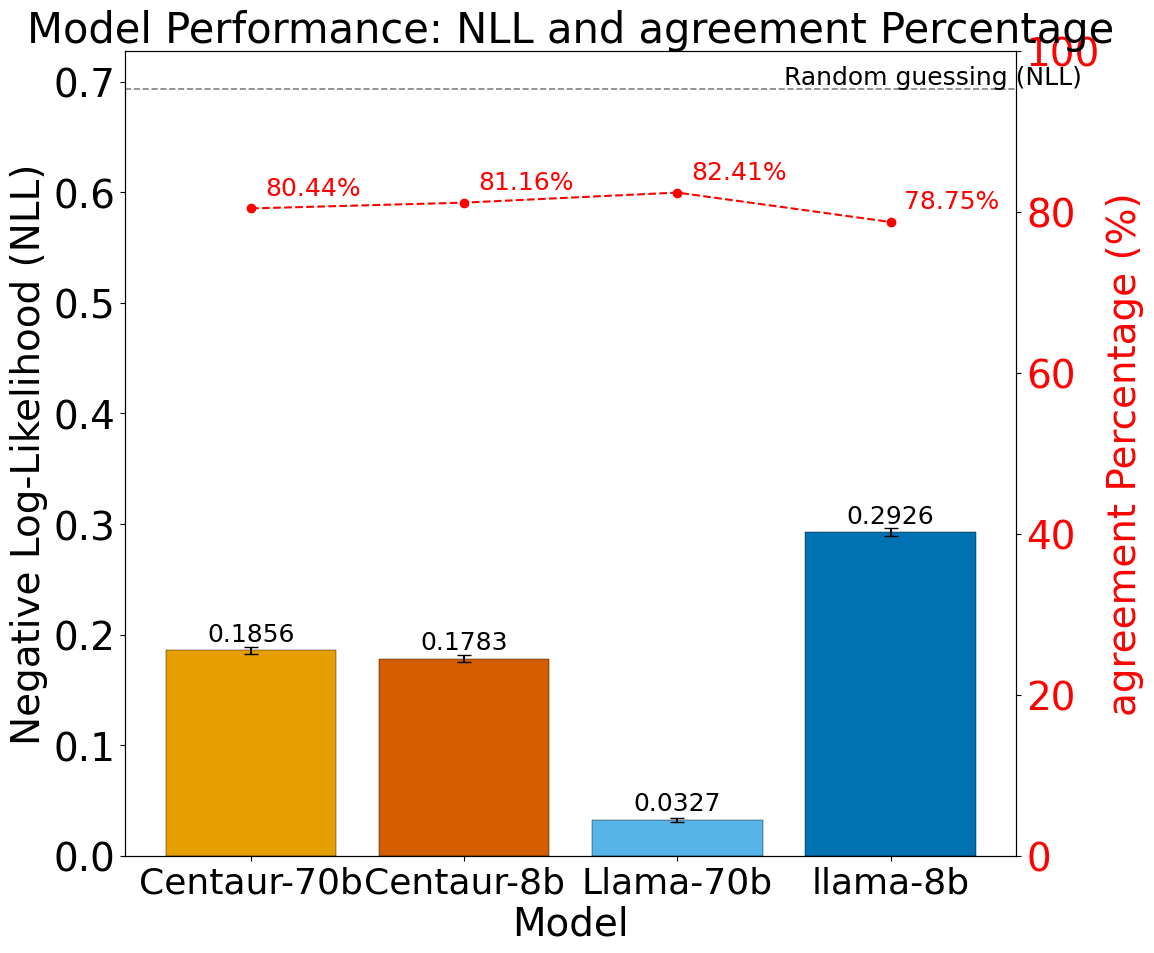

In [134]:
plot_agreement_and_nll(agreement_percentages=[agreement_percentage_70b_centaur,agreement_percentage_8b_centaur,agreement_percentage_70b_llama,agreement_percentage_8b_llama],
                       mean_nlls=[-mean_ll_centaur_70b_model_human,-mean_ll_centaur_8b_human,-mean_ll_llama_70b_model_human,-mean_ll_llama_8b_model_human],
                       sem_nlls=[sem_ll_centaur_70b_model_human,sem_ll_centaur_8b_human,sem_ll_llama_70b_model_human,sem_ll_llama_8b_model_human],
                       model_labels=['Centaur-70b','Centaur-8b','Llama-70b','llama-8b'],
                       colors=['#E69F00', '#D55E00', '#56B4E9', '#0072B2'])

In [135]:
def extract_probs(top2_tokens):
    prob_u = prob_p = None
    for entry in top2_tokens:
        if entry['token'] == 'U':
            prob_u = entry['prob']
        elif entry['token'] == 'P':
            prob_p = entry['prob']
    return pd.Series({'token_U_prob': prob_u, 'token_P_prob': prob_p})

In [136]:
df_llama['top2_tokens'] = df_llama['top2_tokens'].apply(ast.literal_eval)

In [137]:
df_llama_70b['top2_tokens'] = df_llama_70b['top2_tokens'].apply(ast.literal_eval)

In [138]:
df_centaur_70b['top2_tokens']=df_centaur_70b['top2_tokens'].apply(ast.literal_eval)

In [139]:
df_centaur['top2_tokens'] = df_centaur['top2_tokens'].apply(ast.literal_eval)

In [140]:
df_llama_70b[['token_U_prob', 'token_P_prob']] = df_llama_70b['top2_tokens'].apply(extract_probs)


In [141]:
df_llama[['token_U_prob', 'token_P_prob']] = df_llama['top2_tokens'].apply(extract_probs)

In [142]:
df_centaur[['token_U_prob', 'token_P_prob']]=df_centaur['top2_tokens'].apply(extract_probs)
df_centaur_70b[['token_U_prob', 'token_P_prob']]=df_centaur_70b['top2_tokens'].apply(extract_probs)

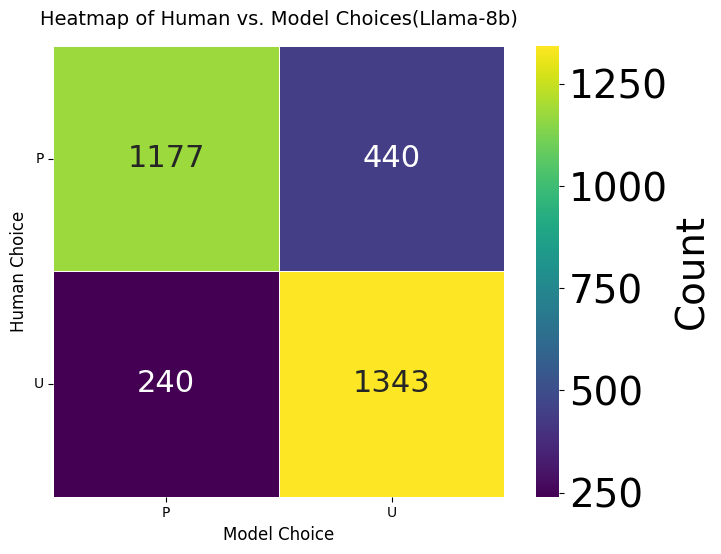

In [143]:
# Group by model and human choices to get count matrix
df_2dhist = pd.DataFrame({
    model_choice: grp['human_choice'].value_counts()
    for model_choice, grp in df_llama.groupby('model_choice')
}).fillna(0).astype(int)

# Sort for consistent display
df_2dhist = df_2dhist.sort_index(axis=0).sort_index(axis=1)

# Plot
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    df_2dhist,
    annot=True, fmt="d", cmap='viridis',
    cbar_kws={'label': 'Count'},
    linewidths=0.5, linecolor='white',
    square=True
)

# Labels
ax.set_title("Heatmap of Human vs. Model Choices(Llama-8b)", fontsize=14, pad=15)
ax.set_xlabel("Model Choice", fontsize=12)
ax.set_ylabel("Human Choice", fontsize=12)

# Tick styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


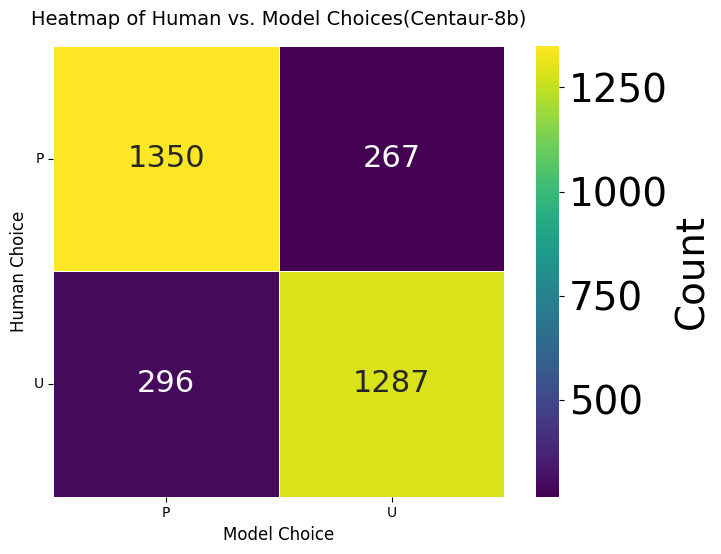

In [144]:

# Group by model and human choices to get count matrix
df_2dhist = pd.DataFrame({
    model_choice: grp['human_choice'].value_counts()
    for model_choice, grp in df_llama_70b.groupby('model_choice')
}).fillna(0).astype(int)

# Sort for consistent display
df_2dhist = df_2dhist.sort_index(axis=0).sort_index(axis=1)

# Plot
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    df_2dhist,
    annot=True, fmt="d", cmap='viridis',
    cbar_kws={'label': 'Count'},
    linewidths=0.5, linecolor='white',
    square=True
)

# Labels
ax.set_title("Heatmap of Human vs. Model Choices(Centaur-8b)", fontsize=14, pad=15)
ax.set_xlabel("Model Choice", fontsize=12)
ax.set_ylabel("Human Choice", fontsize=12)

# Tick styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


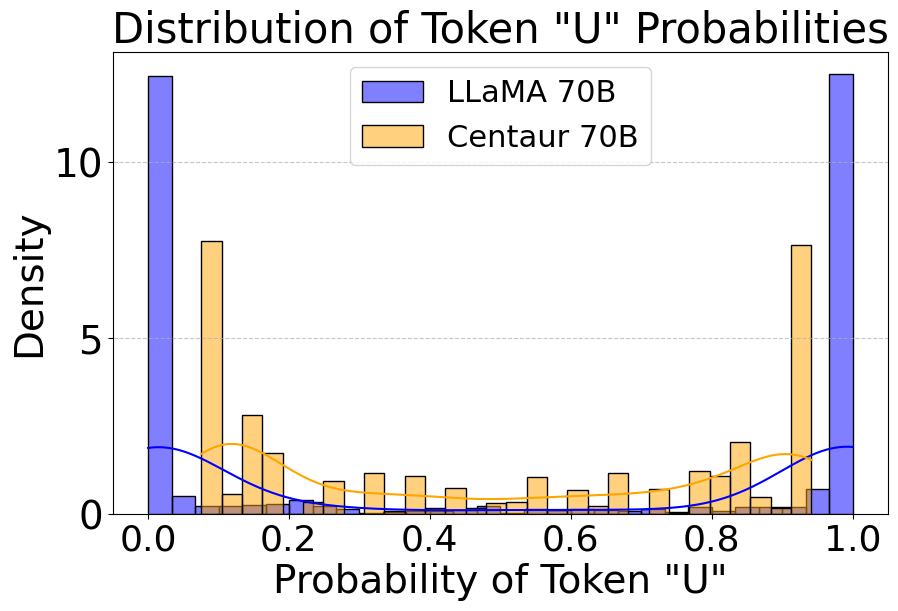

In [145]:
plt.figure(figsize=(10, 6))

# Plot distribution for Llama 70B
sns.histplot(df_llama_70b['token_U_prob'], bins=30, kde=True, color='blue', label='LLaMA 70B', stat='density')

# Plot distribution for Centaur 70B
sns.histplot(df_centaur_70b['token_U_prob'], bins=30, kde=True, color='orange', label='Centaur 70B', stat='density')

plt.title('Distribution of Token "U" Probabilities')
plt.xlabel('Probability of Token "U"')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

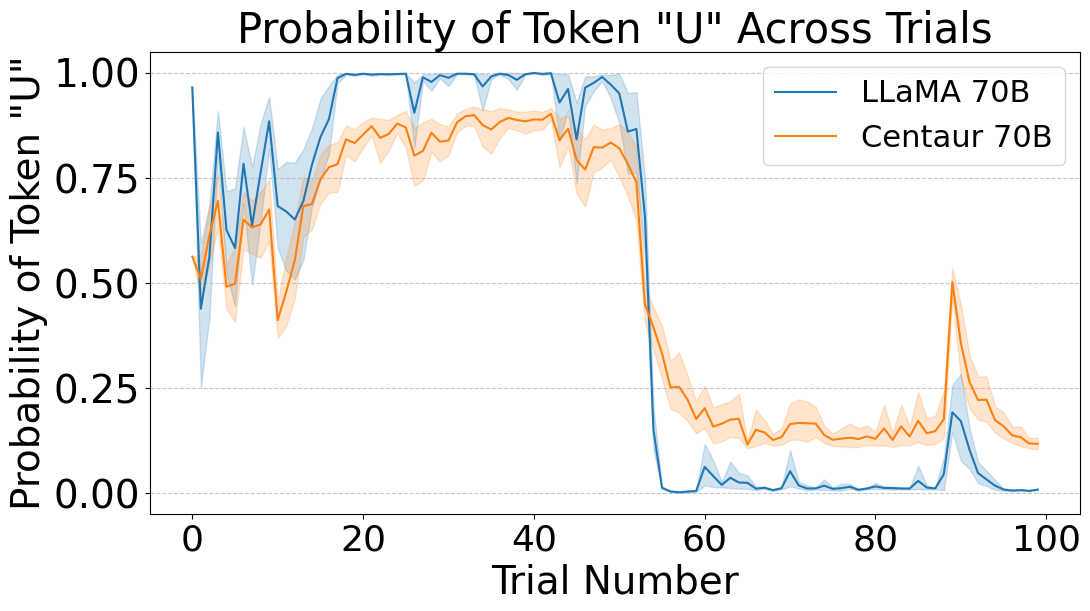

In [146]:
plt.figure(figsize=(12, 6))

# Plot probability of 'U' across trials for Llama 70B
sns.lineplot(data=df_llama_70b, x='trial_num', y='token_U_prob', label='LLaMA 70B')

# Plot probability of 'U' across trials for Centaur 70B
sns.lineplot(data=df_centaur_70b, x='trial_num', y='token_U_prob', label='Centaur 70B')

plt.title('Probability of Token "U" Across Trials')
plt.xlabel('Trial Number')
plt.ylabel('Probability of Token "U"')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()